# Исследование объявлений о продаже квартир

Проанализировать объявления о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Изучить параметры квартир и определить, какие факторы влияют на стоимость квартиры.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd #импорт pandas

In [2]:
selling = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',') #<чтение датасета и присвоение переменной selling>
#<предварительно прочитав датасет и увидев там склеены строки разделю с помощью sep='\t'>

In [3]:
selling.head(5) #вывод пяти первых строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
selling.info() #печать информации о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null object
total_area              23699 non-null object
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null object
floors_total            23613 non-null object
living_area             21796 non-null object
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null object
balcony                 12180 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null object
cityCenters_nearest     18180 non-null object
parks_around3000        18181 non-null object
parks_nearest           8079 non-null object
ponds_around3000        18

Таблица содержит 23699 строк и 22 столбцов. Сразу бросается в глаза, что много столбцов имеют пропущенные значения. Взглянем на них
и посмотрим, что можно с ними сделать.
Пропуски данных с информацией о квартире(наличие балкона, к какому типу недвижимости относится и т.п.) возникли из-за человеческого фактора, неправильное заполнение формы объявления. А её геолокация(расстояние до аэропорта, парки поблизости...) из-за технического.

In [5]:
selling.describe() #посмотрю на характеристики числовых таблиц

,total_images,rooms,floor
count,23699.000000,23699.000000,23699.000000
mean,9.858475,2.070636,5.892358
std,5.682529,1.078405,4.885249
min,0.000000,0.000000,1.000000
25%,6.000000,1.000000,2.000000
50%,9.000000,2.000000,4.000000
75%,14.000000,3.000000,8.000000
max,50.000000,19.000000,33.000000


Еще одна проблема исходной таблицы: почему то столбцы, которые должны быть числом - имеют тип данных object, это тоже
надо исправить.

### Шаг 2. Предобработка данных

### Работа с пропусками

#### Столбцы, с пропущенными значениями

In [6]:
pd.isnull(selling).sum() > 0 #столбцы со значением True содержат пропуск

total_images            False
last_price              False
total_area              False
first_day_exposition    False
rooms                   False
ceiling_height           True
floors_total             True
living_area              True
floor                   False
is_apartment             True
studio                  False
open_plan               False
kitchen_area             True
balcony                  True
locality_name            True
airports_nearest         True
cityCenters_nearest      True
parks_around3000         True
parks_nearest            True
ponds_around3000         True
ponds_nearest            True
days_exposition          True
dtype: bool

#### Заполнение пропусков, где это уместно

Пустые значения в столбце is_apartment заменим на False, потому что при заполнении объявления это поле оставлено пустым, так как данный вид помещения не является апартаментами.

In [7]:
selling['is_apartment'] = selling['is_apartment'].fillna(False) #заменим пустые значения на логическое False

Пустые значения в столбце balcony заменим на 0, так как при заполнении объявления они оставлены пустыми, подразумевая что там балкона нет.

In [8]:
selling['balcony'] = selling['balcony'].fillna(0) #заменим пустые значения на 0

Пустые значения в столбце localty_name заменю на unknown

In [9]:
selling['locality_name'] = selling['locality_name'].fillna('unknown')
#замена пустых значений на unknown(неизвестный)

### Замена типа данных

#### Работа с датой

In [10]:
selling['first_day_exposition'] = pd.to_datetime(selling['first_day_exposition'], format = '%Y-%m-%d')
#перевод столбца с информацией о дате размещения объявления в тип datetume с помощью метода to_datetime
#без указания часа, минуты и секунды, так как у всех объявлений он 00:00:00

In [11]:
selling.info() #результат перевода

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null object
total_area              23699 non-null object
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null object
floors_total            23613 non-null object
living_area             21796 non-null object
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null object
balcony                 23699 non-null object
locality_name           23699 non-null object
airports_nearest        18157 non-null object
cityCenters_nearest     18180 non-null object
parks_around3000        18181 non-null object
parks_nearest           8079 non-null object
ponds_around3000   

#### Столбцы, в которых надо заменить тип данных 
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- floors_total — всего этажей в доме
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- total_area — площадь квартиры в квадратных метрах (м²)

In [12]:
selling[['airports_nearest', 'balcony', 'ceiling_height', 'cityCenters_nearest', 'days_exposition', 'floors_total', 'kitchen_area']].head(10)
#печать 10 строк с первой половиной столбцов из нашего списка

,airports_nearest,balcony,ceiling_height,cityCenters_nearest,days_exposition,floors_total,kitchen_area
0,18863.0,0,2.7,16028.0,NaN,16.0,25.0
1,12817.0,2.0,NaN,18603.0,81.0,11.0,11.0
2,21741.0,0.0,NaN,13933.0,558.0,5.0,8.3
3,28098.0,0.0,NaN,6800.0,424.0,14.0,NaN
4,31856.0,0,3.03,8098.0,121.0,14.0,41.0
5,NaN,0,NaN,NaN,55.0,12.0,9.1
6,52996.0,1.0,NaN,19143.0,155.0,26.0,14.4
7,23982.0,2.0,NaN,11634.0,NaN,24.0,18.9
8,NaN,0,NaN,NaN,189.00000000000003,27.0,8.81
9,50898.0,2.0,2.5,15008.0,289.0,9.0,6.5


In [13]:
selling[['last_price', 'living_area', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'total_area']].head(10)
#печать 10 строк с другой половиной столбцов из нашего списка

,last_price,living_area,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_area
0,13000000.0,51.0,1.0,482.0,2.0,755.0,108.0
1,3350000.0,18.6,0.0,NaN,0.0,NaN,40.4
2,5196000.0,34.3,1.0,90.0,2.0,574.0,56.0
3,64900000.0,NaN,2.0,84.0,3.0,234.0,159.0
4,10000000.0,32.0,2.0,112.0,1.0,48.0,100.0
5,2890000.0,14.4,NaN,NaN,NaN,NaN,30.4
6,3700000.0,10.6,0.0,NaN,0.0,NaN,37.3
7,7915000.0,NaN,0.0,NaN,0.0,NaN,71.6
8,2900000.0,15.43,NaN,NaN,NaN,NaN,33.16
9,5400000.0,43.6,0.0,NaN,0.0,NaN,61.0


In [14]:
selling['airports_nearest'] = selling['airports_nearest'].dropna().astype('float')
selling['balcony'] = selling['balcony'].dropna().astype('float')
selling['ceiling_height'] = selling['ceiling_height'].dropna().astype('float')
selling['cityCenters_nearest'] = selling['cityCenters_nearest'].dropna().astype('float')
selling['days_exposition'] = selling['days_exposition'].dropna().astype('float')
selling['floors_total'] = selling['floors_total'].dropna().astype('float')
selling['kitchen_area'] = selling['kitchen_area'].dropna().astype('float')
selling['last_price'] = selling['last_price'].dropna().astype('float')
selling['living_area'] = selling['living_area'].dropna().astype('float')
selling['parks_around3000'] = selling['parks_around3000'].dropna().astype('float')
selling['parks_nearest'] = selling['parks_nearest'].dropna().astype('float')
selling['ponds_around3000'] = selling['ponds_around3000'].dropna().astype('float')
selling['ponds_nearest'] = selling['ponds_nearest'].dropna().astype('float')
selling['total_area'] = selling['total_area'].dropna().astype('float')
#перевод значений с типа object в тип float с помощью метода astype 
#так же применен метод dropna для игнорирования пустых значений и избежания ошибок

В данном случае переводил в float, т.к. при попытке перевода в int выдавало ошибку

In [15]:
selling.info() #посмотрит на результат перевода

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_ar

In [16]:
selling.describe() #взглянем на характеристики числовых таблиц

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

- В исходной таблице были обнаружены  логические, строковые и числовые пропуски. Некоторые из них появились из-за "некорректного" заполнения объявления пользователем, другие в результате плохой работы геолокации или других приложений работающих с адресами зданий.
- В столбцах с расстоянием и площадью, где должны быть числовые типы данных заменили object на float. Столбец с датой размещения объявления изменили на datetime для дальнейшей удобной работы с ним.
- Пропуски были заполнены лишь в тех случаях, где мы уверены, какое значение должно быть вместо пропуска. Остальные пропуски оставили без изменений, в связи с возможными искажениями результатов дальнейшего анализа.

### Шаг 3. Посчитайте и добавьте в таблицу

#### Расчет цены за квадратный метр и добваления его в таблицу

In [17]:
selling['price_per_square_meter'] = selling['last_price'] / selling['total_area'] #цена за квадратный метр

#### Добваление в таблицу дня недели, месяца и года публикации

In [18]:
selling['weekday'] = selling['first_day_exposition'].dt.weekday #вывод значения дня недели из time

In [19]:
selling['month'] = selling['first_day_exposition'].dt.month #вывод значения месяца из time

In [20]:
selling['year'] = selling['first_day_exposition'].dt.year #вывод значения года из time

#### Столбец с этажом квартиры: первый, последний, другой.

In [21]:
selling.loc[selling['floor'] == 1, 'floor_category'] = 'первый' 
#использование метода .loc с условием и выводом строкового значения в новый столбец
selling.loc[selling['floor'] == selling['floors_total'], 'floor_category'] = 'последний'
#использование метода .loc с условием и выводом строкового значения в новый столбец
selling.loc[(selling['floor'] != selling['floors_total']) & (selling['floor'] != 1), 'floor_category'] = 'другой'
#использование метода .loc с условием и выводом строкового значения в новый столбец

#### Соотношение жилой и общей площади и площади кухни к общей.

In [22]:
selling['ratio_of_living_area_and_total_area'] = selling['living_area'] / selling['total_area'] #расчет доли жилой площади ко всей

In [23]:
selling['ratio_of_kitchen_area_and_total_area'] = selling['kitchen_area'] / selling['total_area'] #расчет доли площади кухни к общей

In [24]:
selling.head(3) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_category,ratio_of_living_area_and_total_area,ratio_of_kitchen_area_and_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214


In [25]:
selling.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,ratio_of_living_area_and_total_area,ratio_of_kitchen_area_and_total_area
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,...,8079.000000,18181.000000,9110.000000,20518.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,21796.000000,21421.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,...,490.804555,0.770255,517.980900,180.888634,9.942166e+04,2.569307,6.400101,2017.367146,0.564766,0.187355
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,...,342.317995,0.938346,277.720643,219.727988,5.030680e+04,1.789082,3.491561,1.039771,0.105368,0.072968
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,...,288.000000,0.000000,294.000000,45.000000,7.658547e+04,1.000000,3.000000,2017.000000,0.495177,0.133333
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,455.000000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.567860,0.172414
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,...,612.000000,1.000000,729.000000,232.000000,1.142563e+05,4.000000,10.000000,2018.000000,0.637880,0.232416
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Построение гистограмм для площади, цены, число комнат и высоты потолков.

In [26]:
columns_need = ['last_price', 'total_area', 'rooms', 'ceiling_height', 'ratio_of_living_area_and_total_area', 'ratio_of_kitchen_area_and_total_area'] #отберу нужные столбцы для исследования из общей таблицы

In [27]:
columns_need_median = selling.pivot_table(index='rooms', values=['last_price', 'total_area', 'ceiling_height', 'ratio_of_living_area_and_total_area', 'ratio_of_kitchen_area_and_total_area'], aggfunc=['median', 'mean'])
columns_need_median
#взгялнем на изменений медианы и алг.среднего других интересующих нас значений относительно количества квартир

median                                                    \
      ceiling_height   last_price ratio_of_kitchen_area_and_total_area   
rooms                                                                    
0              2.750    2700000.0                                  NaN   
1              2.640    3600000.0                             0.247839   
2              2.600    4770169.0                             0.161075   
3              2.650    6200000.0                             0.128571   
4              2.800    9000000.0                             0.112245   
5              3.100   14000000.0                             0.105386   
6              3.200   19000000.0                             0.099502   
7              3.380   24900000.0                             0.083717   
8              3.420   23095000.0                             0.109170   
9              3.200   23750000.0                             0.049620   
10             3.150   23000000.0                             0.091624   
11             3.415   25250000.0                             0.066855   
12             2.800  420000000.0                             0.124444   
14             3.160   26829500.0                             0.075636   
15             3.500   65000000.0                             0.169492   
16             3.000   28500000.0                             0.048148   
19               NaN   32250000.0                             0.073679   

                                                               mean  \
      ratio_of_living_area_and_total_area total_area ceiling_height   
rooms                                                                 
0                                0.689655      26.05       3.104268   
1                                0.482488      36.56       2.716267   
2                                0.585009      53.00       2.756499   
3                                0.631667      73.00       2.774450   
4                                0.659740      99.30       2.925737   
5                                0.651842     146.45       3.171429   
6                                0.679412     184.30       3.252162   
7                                0.681670     214.00       3.413488   
8                                0.688475     235.70       3.426667   
9                                0.628251     300.95       3.064286   
10                               0.653103     272.60       3.263333   
11                               0.710093     188.90       3.415000   
12                               0.455222     900.00       2.800000   
14                               0.648695     304.20       3.160000   
15                               0.693220     590.00       3.500000   
16                               0.666667     270.00       3.000000   
19                               0.706086     374.60            NaN   

                                                          \
         last_price ratio_of_kitchen_area_and_total_area   
rooms                                                      
0      3.337724e+06                                  NaN   
1      3.835362e+06                             0.249906   
2      5.591605e+06                             0.174163   
3      8.179119e+06                             0.140928   
4      1.342350e+07                             0.124031   
5      2.376208e+07                             0.113455   
6      3.170975e+07                             0.104150   
7      5.147007e+07                             0.091932   
8      5.022417e+07                             0.091708   
9      3.415236e+07                             0.075054   
10     2.616667e+07                             0.088013   
11     2.525000e+07                             0.066855   
12     4.200000e+08                             0.124444   
14     2.682950e+07                             0.075636   
15     6.500000e+07                             0.169492   
16     2.850000e+07             

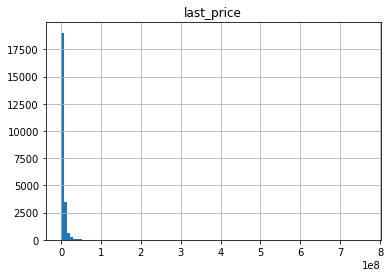

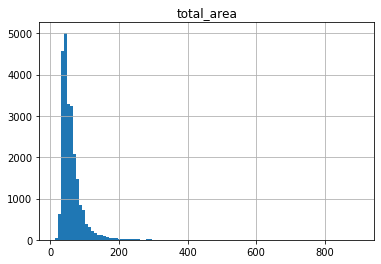

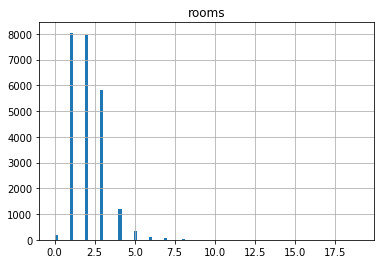

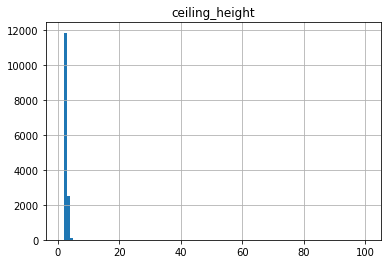

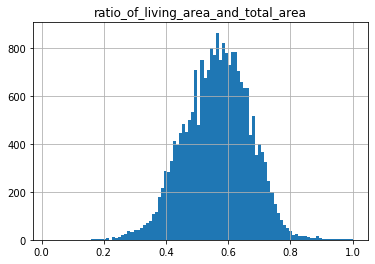

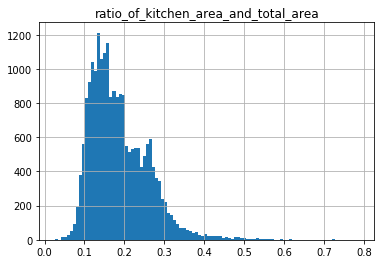

In [28]:
for name in columns_need:
    selling.hist(name, label=name, bins=100)

### Вывод по гистограммам
- Большинство гистограмм отображают нормальное распределение Пуассона, что говорит о приближение к действительности, полученных данных;
- В гистограммах так же присутствуют выбросы

## Изучение времени продажи квартиры

In [29]:
selling['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

#### Среднее время продажи квартиры

In [30]:
selling['days_exposition'].describe()['mean']

180.88863436982163

#### Медианное время продажи квартиры

In [31]:
selling['days_exposition'].describe()['50%']

95.0

#### Построение гистограммы для дней продажи квартиры

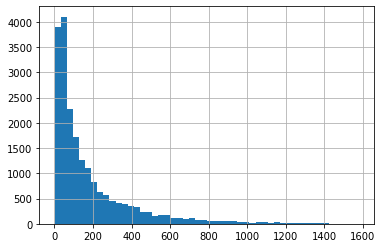

In [32]:
selling['days_exposition'].hist(bins=50)

#### Описание сверх быстрых продаж и очень долгих

Для этого хорошо подойдет диаграмма размаха. Для этого нам понадобится:
- квантили 25% и 75%

In [33]:
import matplotlib.pyplot as plt 
#импорт библиотеки matplotlib

(-235.5, 512.5)

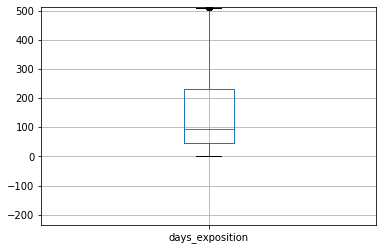

In [34]:
quan1 = selling['days_exposition'].describe()['25%'] #нахождение 25%квантиля
quan3 = selling['days_exposition'].describe()['75%'] #нахождение 75%квантиля
inter_range = quan3 - quan1 #границы ящика
lower = quan1 - 1.5*inter_range #нижняя границы "уса" размаха
upper = quan3 + 1.5*inter_range #верхняя граница "уса" размаха
selling.boxplot('days_exposition') #построение диаграммы размаха
plt.ylim(lower, upper) #размечу границы для построения даиграммы, для лучшего отображения

Так как дни продаж не могут быть отрицательными, то границы нормальных продаж - это (0; 512,5) дней. Все что вне этой границы можно считать серх долгими.

## Значения, которые выбиваются из общей таблицы или являются редкими

По аналогии с предыдущим пунктом буду использовать диаграмму размаха для того, чтобы отсеить выбивающиеся значения. Все это автоматизирую и создам фильтр.

In [35]:
def filter_outliers(df, column_name, remove_outliers=False):
    print(column_name)
    df_column = df[column_name]
    quartile_1 = df_column.describe()['25%']
    quartile_3 = df_column.describe()['75%']
    interquartile_range = quartile_3 - quartile_1
    upper_whisker = quartile_1 + 1.5 * interquartile_range
    lower_whisker = max(quartile_1 - 1.5 * interquartile_range, df_column.min())
    
    df.boxplot(column_name)
    plt.ylim(lower_whisker, upper_whisker)
    plt.show()
    
    print('Хорошие значения от', lower_whisker, 'до', upper_whisker)
    outliers = df[(df_column < lower_whisker) | (df_column > upper_whisker) |
                 (df_column.isnull())]
    print('Количество отклоняющихся значений:', outliers.shape[0])
    
    if remove_outliers:
        df.drop(outliers.index, inplace=True)
        print('Выбросы были удалены. В таблице осталось', len(df), 'строк')
    print('-' * 100)

num_rows_before = selling.shape[0]

In [36]:
selling.corr()['last_price']

total_images                            0.104473
last_price                              1.000000
total_area                              0.653675
rooms                                   0.363343
ceiling_height                          0.085430
floors_total                           -0.006984
living_area                             0.566492
floor                                   0.026576
is_apartment                            0.026958
studio                                 -0.025362
open_plan                              -0.008802
kitchen_area                            0.519869
balcony                                 0.008559
airports_nearest                       -0.026239
cityCenters_nearest                    -0.206747
parks_around3000                        0.151058
parks_nearest                          -0.016414
ponds_around3000                        0.159996
ponds_nearest                          -0.084809
days_exposition                         0.081146
price_per_square_met

Буду производить фильтрацию исходной таблицы по тем величинам, чья корреляции к цене квартиры является значимым.
Условной границей степени корреляции возьму 0,3 по источнику [Величина и сила коэффициента корреляции](https://statpsy.ru/correlation/velicina/)

In [37]:
col_needed = ['total_area', 'rooms', 'living_area', 'kitchen_area', 'price_per_square_meter']

total_area


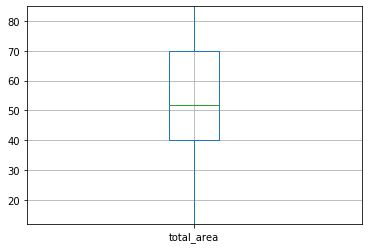

Хорошие значения от 12.0 до 84.85000000000001
Количество отклоняющихся значений: 3192
Выбросы были удалены. В таблице осталось 20507 строк
----------------------------------------------------------------------------------------------------
rooms


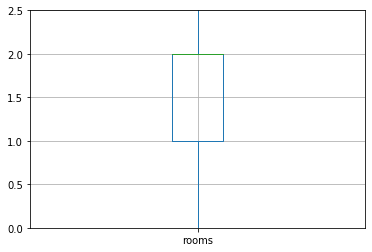

Хорошие значения от 0 до 2.5
Количество отклоняющихся значений: 4594
Выбросы были удалены. В таблице осталось 15913 строк
----------------------------------------------------------------------------------------------------
living_area


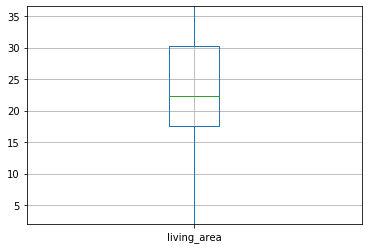

Хорошие значения от 2.0 до 36.55
Количество отклоняющихся значений: 2170
Выбросы были удалены. В таблице осталось 13743 строк
----------------------------------------------------------------------------------------------------
kitchen_area


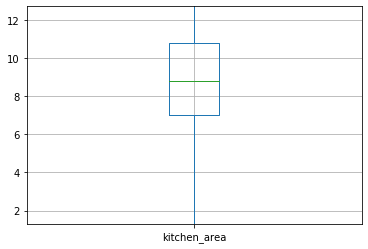

Хорошие значения от 1.3 до 12.700000000000001
Количество отклоняющихся значений: 2180
Выбросы были удалены. В таблице осталось 11563 строк
----------------------------------------------------------------------------------------------------
price_per_square_meter


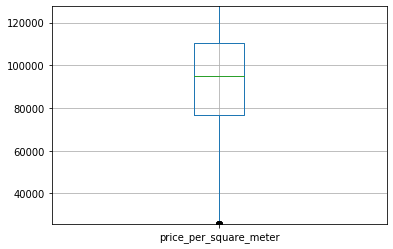

Хорошие значения от 25743.371212121223 до 127589.96212121213
Количество отклоняющихся значений: 1334
Выбросы были удалены. В таблице осталось 10229 строк
----------------------------------------------------------------------------------------------------


In [38]:
for column_name in col_needed:
    filter_outliers(selling, column_name, remove_outliers=True)

### Какие факторы больше всего влияют на стоимость квартиры?

    К полученным в предыдущем шаге факторам:
- total_area;
- living_area;
- kitchen_area;
- price_per_square_meter.

      Добавим отдельно число комнат, этаж, удалленость от центра города и даты размещения(день недели, месяц, год).

In [39]:
selling.corr()['last_price'] #кореляция по цене квартир к числовым значениям отфильтрованных данных

total_images                            0.170860
last_price                              1.000000
total_area                              0.602325
rooms                                   0.358922
ceiling_height                          0.036348
floors_total                            0.352227
living_area                             0.436480
floor                                   0.242511
is_apartment                            0.010487
studio                                       NaN
open_plan                                    NaN
kitchen_area                            0.377561
balcony                                 0.100060
airports_nearest                       -0.038678
cityCenters_nearest                    -0.313932
parks_around3000                       -0.000422
parks_nearest                           0.038096
ponds_around3000                       -0.009045
ponds_nearest                           0.031762
days_exposition                        -0.037287
price_per_square_met

Видно, что после фильтрации таблицы корреляция основных параметров, влияющих на цену квартиры выросла.

#### Зависимость цены квартиры от цены на квадртаный метр

In [40]:
selling['last_price'].corr(selling['price_per_square_meter']) 

0.7299915865921114

Видно, что с ростом цены за кв.метр и цена на квартиру растет

#### Зависимость цены квартиры от количества комнат

In [41]:
selling['rooms'].corr(selling['last_price'])

0.3589217536299316

Количества комнат так же влияет на цену квартиры, но не так сильно как цена за кв.метр

#### Зависимость цены квартиры от удаленности от центра города

In [42]:
selling['last_price'].corr(selling['cityCenters_nearest']) 

-0.313932227657041

Чем дальше от центра города, тем ниже стоимость квартиры.

#### Зависимость цены квартиры от этажа

In [43]:
selling.loc[selling['floor'] == 1, 'floor_category_num'] = 0 
#использование метода .loc с условием и выводом строкового значения в новый столбец
selling.loc[selling['floor'] == selling['floors_total'], 'floor_category_num'] = 2
#использование метода .loc с условием и выводом строкового значения в новый столбец
selling.loc[(selling['floor'] != selling['floors_total']) & (selling['floor'] != 1), 'floor_category_num'] = 1
#использование метода .loc с условием и выводом строкового значения в новый столбец
selling['floor_category_num'].head()
# где значения в столлце floor_category_num равные 0 это квартиры на первом этаже, равные 2 на последнем и равные 1 на другом.

1     0.0
2     1.0
5     1.0
8     1.0
10    1.0
Name: floor_category_num, dtype: float64

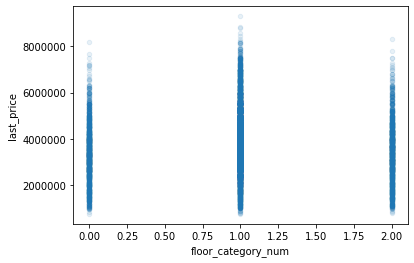

In [44]:
selling.plot(x='floor_category_num', y='last_price', kind='scatter', alpha=0.1)

Цена за квартиру в зависимости от этажа:
- самые дешевые на первом этаже
- немного дороже на последнем
- самые дорогие в других этажах

### Зависимость цены квартиры от даты размещения

#### Зависимость от дня недели

In [45]:
selling['last_price'].corr(selling['weekday'])

-0.0060236536011321375

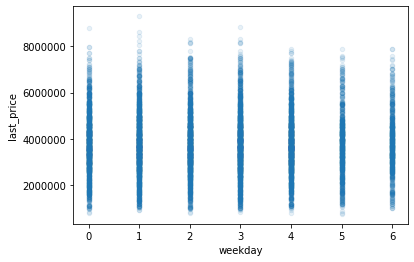

In [46]:
selling.plot(x='weekday', y='last_price', kind='scatter', alpha=0.1)

#### Зависимость от месяца

In [47]:
selling['last_price'].corr(selling['month'])

-0.0008169664601401012

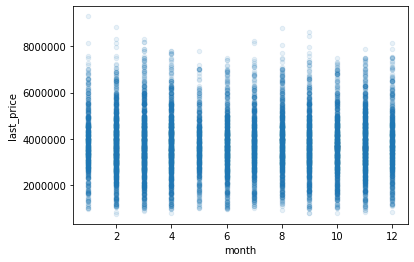

In [48]:
selling.plot(x='month', y='last_price', kind='scatter', alpha=0.1)

#### Зависимость от года

In [49]:
selling['last_price'].corr(selling['year'])

0.05623598662673743

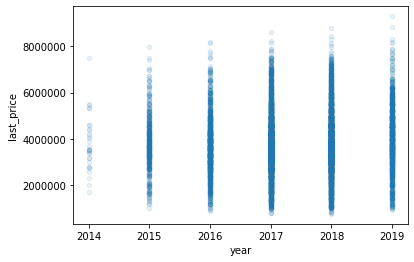

In [50]:
selling.plot(x='year', y='last_price', kind='scatter', alpha=0.1)

### Вывод по данному пункту:
- цена практически не зависит от дня размещения объявления
- так же не зависит от месяца публикации, но стоит отметить, что минимальная цена за квартиру в мае
- с каждым годом цена за квартиру растет и увеличвается число объявлений, наибольший рост при переходе с 2016 на 2017 год. 

### Цена за жилье в 10 городах с наибольшим количеством объявлений

In [51]:
top_10cities = selling['locality_name'].value_counts().head(10)#десять городов с наибольшим кол-вом объявлений
top_10cities #печать списка городов

Санкт-Петербург      5938
посёлок Мурино        286
посёлок Шушары        252
Всеволожск            211
Гатчина               206
Колпино               191
Пушкин                173
посёлок Парголово     170
деревня Кудрово       148
Петергоф              132
Name: locality_name, dtype: int64

In [52]:
top10_data = selling.query('locality_name in ("Санкт-Петербург","посёлок Мурино", "посёлок Шушары", "Всеволожск", "Колпино", "Гатчина", "Пушкин", "посёлок Парголово", "Петергоф", "деревня Кудрово")')
#сделаем по этим 10 городам из общей таблицы

In [53]:
top10_data.pivot_table(index="locality_name", values="price_per_square_meter", aggfunc=['mean', 'max', 'min'])

,mean,max,min
,price_per_square_meter,price_per_square_meter,price_per_square_meter
locality_name,,,
Всеволожск,68299.614310,104166.666667,31400.000000
Гатчина,68850.906734,105818.181818,28205.128205
Колпино,78753.775200,103981.481481,47957.371226
Петергоф,83438.386733,125673.249551,61340.909091
Пушкин,99128.518460,127045.454545,59836.065574
Санкт-Петербург,101223.446378,127586.206897,41025.641026
деревня Кудрово,94552.024863,123878.205128,70689.655172
посёлок Мурино,88161.881221,127200.000000,59726.027397


Видно, что в области средняя цена за кв.метр ниже чем в Санкт-Петербурге.

Максимальная цена за квадратный метр:
- в Санкт-Петербурге и составляет - 125586,207

Минимальая цена: 
- в Гатчине и составляет - 28205,128

### Нахождение условной границы центра города для Санкт-Петербурга

Для начала сделаем срез из общей таблицы, оставив только Санкт-Петербург.

In [54]:
data_spb = selling.query('locality_name == "Санкт-Петербург"') #делаем срез

In [55]:
data_spb['cityCenters_km'] = data_spb['cityCenters_nearest']/1000 #создаем столбец до центра города,в км
data_spb['cityCenters_km'].head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2     13.933
10    13.878
15    14.259
17    14.616
18    10.842
21     9.722
23    14.211
34    12.739
36    16.461
39    12.209
Name: cityCenters_km, dtype: float64

In [56]:
data_spb['cityCenters_km'] = round(data_spb['cityCenters_km']) #округляем данные до центра города в км до целых
data_spb['cityCenters_km'].head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2     14.0
10    14.0
15    14.0
17    15.0
18    11.0
21    10.0
23    14.0
34    13.0
36    16.0
39    12.0
Name: cityCenters_km, dtype: float64

In [57]:
data_spb.pivot_table(index='cityCenters_km', values='last_price', aggfunc='mean')

,last_price
cityCenters_km,
1.0,5.520750e+06
2.0,5.460000e+06
3.0,5.108794e+06
4.0,5.443274e+06
5.0,4.975701e+06
6.0,4.859728e+06
7.0,4.942875e+06
8.0,4.466976e+06
9.0,4.316414e+06


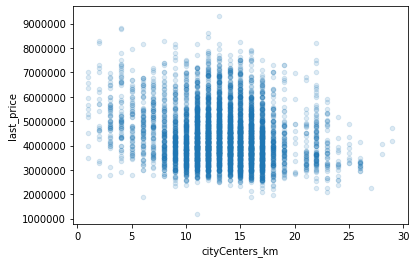

In [58]:
data_spb.plot(x='cityCenters_km', y='last_price', kind='scatter', alpha=0.15)

Из графика видно, что резкий спад цен просиходит на 6 километре. Затем цены начинают опять ползти вверх.
P.S. в поддержку своих слов это так же можно заметить в созданной выше pivot_table.

### Анализ объявлений в центре города.

Сделаю срез для центра города

In [59]:
spb_centre = data_spb.query('cityCenters_km <= 6') #срез с условием, что центр города в радиусе 6 км

Для сравнения возьму остальную часть Санкт-Петербурга без центра

In [60]:
spb_outer = data_spb.query('cityCenters_km > 6') #срез для остального Петербурга без центра

In [61]:
spb_centre.pivot_table(index='cityCenters_km', values=["total_area", "last_price", "rooms", "ceiling_height"], aggfunc=['mean', 'min', 'max'])
#характеристика квартир в центре города

mean                                     \
               ceiling_height    last_price     rooms total_area   
cityCenters_km                                                     
1.0                  2.998750  5.520750e+06  1.916667  51.591667   
2.0                  3.030833  5.460000e+06  1.714286  50.861905   
3.0                  3.087857  5.108794e+06  1.693878  47.783878   
4.0                  2.933226  5.443274e+06  1.725806  49.912419   
5.0                  2.937813  4.975701e+06  1.684211  46.524561   
6.0                  2.779423  4.859728e+06  1.703704  45.501235   

                          min                                        max  \
               ceiling_height last_price rooms total_area ceiling_height   
cityCenters_km                                                             
1.0                      2.50  3500000.0     1      39.00           3.50   
2.0                      2.65  2750000.0     1      28.60           3.65   
3.0                      2.50  2800000.0     1      31.00           4.00   
4.0                      2.50  2920000.0     1      23.29           4.19   
5.0                      2.50  2800000.0     1      30.10           3.50   
6.0                      2.50  1900000.0     1      17.00           3.54   

                                            
               last_price rooms total_area  
cityCenters_km                              
1.0             6999000.0     2       63.3  
2.0             8300000.0     2       70.1  
3.0             6990000.0     2       66.0  
4.0             8840000.0     2       71.6  
5.0             7952112.0     2       84.1  
6.0             8150000.0     2       76.4

In [62]:
spb_outer.pivot_table(index='cityCenters_km', values=["total_area", "last_price", "rooms", "ceiling_height"], aggfunc=['mean', 'min', 'max'])

mean                                     \
               ceiling_height    last_price     rooms total_area   
cityCenters_km                                                     
7.0                  2.766379  4.942875e+06  1.795455  47.303409   
8.0                  2.907283  4.466976e+06  1.617021  43.020213   
9.0                  2.685448  4.316414e+06  1.528634  42.587181   
10.0                 2.598600  4.277823e+06  1.506211  41.829255   
11.0                 2.682857  4.343058e+06  1.562278  43.052900   
12.0                 2.610605  4.397642e+06  1.458278  42.743934   
13.0                 2.661816  4.540166e+06  1.518462  44.189954   
14.0                 2.641011  4.370790e+06  1.435976  42.857241   
15.0                 2.610678  4.274397e+06  1.413074  42.444979   
16.0                 2.602680  4.202667e+06  1.424920  42.992157   
17.0                 2.617473  4.098834e+06  1.471132  42.778868   
18.0                 2.606234  4.119698e+06  1.397260  42.190616   
19.0                 2.625614  4.189233e+06  1.464286  43.277262   
20.0                 2.392857  4.277417e+06  1.416667  42.350000   
21.0                 2.688889  3.934456e+06  1.400000  43.540000   
22.0                 2.629592  4.276729e+06  1.372340  46.213298   
23.0                 2.603871  3.942333e+06  1.404762  43.040476   
24.0                 2.750000  3.349125e+06  1.187500  39.331250   
25.0                 2.725000  3.825556e+06  1.333333  44.411111   
26.0                 2.618750  3.272933e+06  1.066667  37.371333   
27.0                      NaN  2.250000e+06  1.000000  32.000000   
28.0                      NaN  3.869000e+06  1.000000  38.500000   
29.0                 3.050000  4.450000e+06  2.000000  53.900000   

                          min                                        max  \
               ceiling_height last_price rooms total_area ceiling_height   
cityCenters_km                                                             
7.0                      2.50  2800000.0     1      29.50           3.40   
8.0                      2.50  2750000.0     1      23.40          24.00   
9.0                      2.40  2346000.0     1      25.00           4.00   
10.0                     2.45  2400000.0     1      22.00           3.30   
11.0                     2.48  1190000.0     1      14.00          26.00   
12.0                     2.00  2600000.0     1      22.70           3.00   
13.0                     2.47  2500000.0     1      22.00          25.00   
14.0                     1.00  2370000.0     1      25.00          14.00   
15.0                     2.30  2320000.0     1      26.00           3.30   
16.0                     2.40  1870000.0     1      20.00           3.10   
17.0                     2.50  2100000.0     1      26.00           3.30   
18.0                     2.40  1961100.0     1      25.00           3.00   
19.0                     2.50  2650000.0     1      29.61           3.10   
20.0                     1.75  2850000.0     1      30.60           2.50   
21.0                     2.50  2750000.0     1      29.00           3.15   
22.0                     2.50  2250000.0     1      29.20           3.12   
23.0                     2.48  2080000.0     1      28.00           3.00   
24.0                     2.70  2400000.0     1      31.00           2.80   
25.0                     2.65  3300000.0     1      32.00           2.80   
26.0                     2.50  2950000.0     1      33.00           2.75   
27.0                      NaN  2250000.0     1      32.00            NaN   
28.0                      NaN  3666000.0     1      38.00            NaN   
29.0                     2.60  4200000.0     2      51.00           3.50   

                                            
               last_price rooms total_area  
cityCenters_km                              
7.0             7200000.0     2      67.87  
8.0             8300000.0     2      65.90  
9.0             8150000.0     2      75.20  
10.0     

#### Маленький вывод по двум таблицам

- средняя цена за квартиру в центре выше
- высота потолков в центре так же выше и примерно 3 метра, в остальном городе в районе 2,5
- среднее количество комнат в центре больше 2,2 
- общая площадь квартир больше в центре

### Сравнение факторов, влияющих на цену квартир в центре города и в остальной части

#### Центр Санкт-Петербугра. 

Влияние количеств комнат на цену

In [63]:
spb_centre['last_price'].corr(spb_centre['rooms']) 

0.4352939118882398

Зависимость от расстояния до центра

In [64]:
spb_centre['last_price'].corr(spb_centre['cityCenters_nearest']) 

-0.1292403951436024

Зависимость цены от этажа

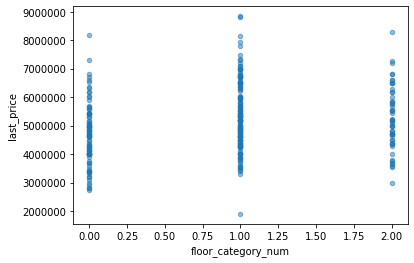

In [65]:
spb_centre.plot(x='floor_category_num', y='last_price', kind='scatter', alpha=0.5)

Зависимость от даты размещения объявления

In [80]:
spb_centre['last_price'].corr(spb_centre['weekday'])

-0.0005882086889381212

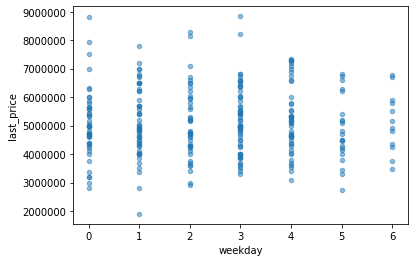

In [73]:
spb_centre.plot(x='weekday', y='last_price', kind='scatter', alpha=0.5)

In [81]:
spb_centre['last_price'].corr(spb_centre['month'])

-0.04206898798454014

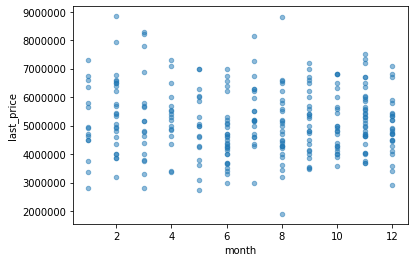

In [71]:
spb_centre.plot(x='month', y='last_price', kind='scatter', alpha=0.5)

In [82]:
spb_centre['last_price'].corr(spb_centre['year'])

0.0935150034269213

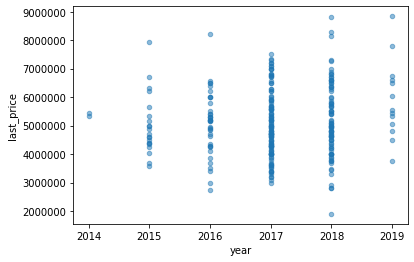

In [74]:
spb_centre.plot(x='year', y='last_price', kind='scatter', alpha=0.5)

#### Остальная часть Санкт-Петербурга

Повторим все те же шаги, что сделали ранее для центра города.

Влияние количеств комнат на цену

In [77]:
spb_outer['last_price'].corr(spb_outer['rooms'])

0.5165989958464626

Зависимость от расстояния до центра

In [78]:
spb_outer['last_price'].corr(spb_outer['cityCenters_nearest']) 

-0.11297543771439181

Зависимость цены от этажа

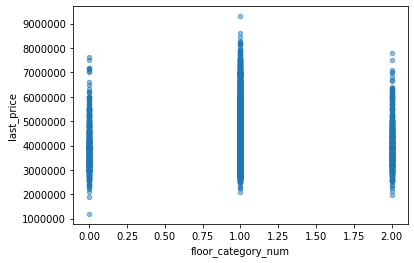

In [79]:
spb_outer.plot(x='floor_category_num', y='last_price', kind='scatter', alpha=0.5)

Зависимость от даты размещения объявления

In [83]:
spb_outer['last_price'].corr(spb_outer['weekday'])

-0.0026048362121972096

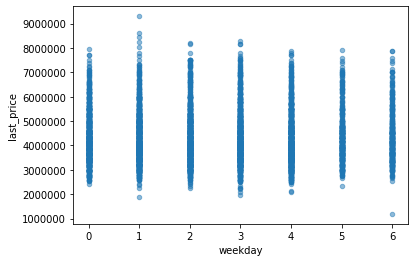

In [84]:
spb_outer.plot(x='weekday', y='last_price', kind='scatter', alpha=0.5)

In [85]:
spb_outer['last_price'].corr(spb_outer['month'])

-0.021867412122008968

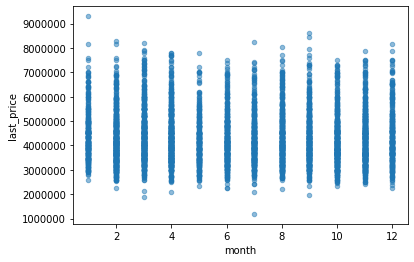

In [86]:
spb_outer.plot(x='month', y='last_price', kind='scatter', alpha=0.5)

In [87]:
spb_outer['last_price'].corr(spb_outer['year'])

0.1218213205798962

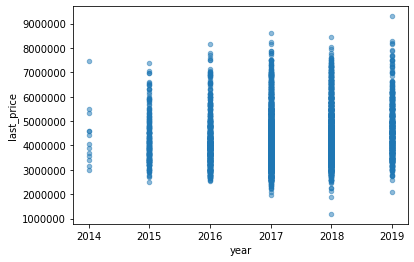

In [88]:
spb_outer.plot(x='year', y='last_price', kind='scatter', alpha=0.5)

#### Выводы по данной задаче(сравнение центра Санкт-Петербурга и остальной часть города)
- Количество комнат влияет на общую цену; в центре Питера корреляция ниже 0,44 против 0,52
- Чем дальше от центра, тем ниже цены
- Цена практически не зависит от дня недели и месяца размещения объявления(есть месяца, когда количество объявлений падает - май, июнь). Стоит обратить внимание на то, что с каждым годом цена за квартиру растет(на столь больших отрезках времени, можно заметить инфляцию)
- От этажа размещения квартиры цена тоже меняется: минимальная цена для первого этажа. Самая дорогая недвижимость на "других" эатажах.

### Шаг 5. Общий вывод

### Что мы обнаружили?

1) Наиболее важные характеристики недвижимости(корреляция>0.3):
    - Жилая площадь
    - Площадь кухни
    - Цена за кв.метр
    - Количество комнат
    - Общая площадь
2) Обнаружили выбросы в нашей выборке. Удаляли их, исходя из логики: 
    - оценивали самые важные характеристики ценообразования для недвижимости
    - применяли фильтр диаграммы выбросов для столбцов, содержащих данную информацию
    - остальные столюцы не трогали, во избежания потери информации, которая в дальнейшем может оказаться полезной (для мат.моделирования, например, чем больше данных - тем точнее наша модель)
3) Провели доп.исследование других параметров:
    - чем дальше от центра, тем ниже цена
    - на первом этаже самые дешевые квартиры
    - цена практически не меняется от даты объявления; на больших отрезках времени(год) можно наблюдать рост цен - на таком масштабе наглядно видно рост инфляции
    - в мае месяца есть аномалия - квартиры дешевле, чем в остальных месяцах(видимо, падает спрос в это время на рынке недвижимости)
4) Выбрали топ 10 населенных пунктов по кол-ву объявлений
    - как и ожидалось самые дорогие квартиры в Питере
5) Нашли "условную" границу для центра Петербурга и сравнили данные с остальной частью города:
    - по всему городу "двушки" - самые популярыне квартиры
    - количество комнат больше оказывает влияние на цену в остальном городе, чем в центре
    - высота потолков, общая площадь, средн.число комнат, как и предполагалось, больше в центре города
    - для всего города: 
        - на первом этаже - самые дешевые квартиры
        - чем дальше от центра, тем ниже цена
        - с каждым годом цена за квартиру растет
        - в мае наблюдается спад общей цены недвижимости
6) Стоить отдельно отметить, что полученные графики распределения - распределение Пуассона, значит данные не так уж далеки от реальных.